<a href="https://colab.research.google.com/github/raheeltahir55/CE888/blob/main/Lab4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [7]:
data= pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", header= None)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [52]:
print(len(data))

24983


In [9]:
orig_data= data
data= data.replace(to_replace=99, value= np.nan)

In [54]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [10]:
data= data.drop(columns=0)
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [11]:
ranking = data.rank(axis=1, method='average')

In [56]:
means= data.mean(axis = 0, skipna = True)
#means_=means.values
print(means)

1      0.904573
2      0.208460
3      0.316574
4     -1.449114
5      0.403556
         ...   
96     1.528003
97     1.673750
98     0.767692
99    -0.031244
100    1.354711
Length: 100, dtype: float64


In [13]:
max_index_row = np.argmax(means)
min_index_row = np.argmin(means)
print("Joke no", max_index_row, "has best rating")
print("Joke no", min_index_row, "has worst rating")

Joke no 49 has best rating
Joke no 57 has worst rating


In [14]:
arr= data.values

In [15]:
#rated = np.where(arr!=np.nan)
#print(len(rated[0]), rated[1].shape)

rated = np.where(~np.isnan(arr))
print(len(rated[0]), rated[1].shape)

## rated[0] is the indices for rows and rated[1] is the indices of columns

1810455 (1810455,)


In [16]:
print(len(rated[0]))

1810455


In [17]:
print(len(rated[1]))

1810455


In [18]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(~np.isnan(arr))
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [20]:
new_arr, idx = replace(arr, 0.1)

In [21]:
print(new_arr)

[[-7.82  8.79 -9.66 ...   nan   nan   nan]
 [ 4.08 -0.29  6.36 ...  0.34 -4.32 99.  ]
 [  nan   nan   nan ...   nan   nan   nan]
 ...
 [  nan   nan   nan ...   nan   nan   nan]
 [  nan   nan   nan ...   nan   nan   nan]
 [ 2.43 99.   -3.98 ...   nan   nan   nan]]


In [22]:
print(idx)

(array([ 5619, 13292, 23776, ...,  3138, 16423,  9533]), array([37, 20, 99, ..., 46, 85, 16]))


In [23]:
print(rated)

(array([    0,     0,     0, ..., 24982, 24982, 24982]), array([ 0,  1,  2, ..., 69, 70, 86]))


In [24]:
arr[idx[0][0], idx[1][0]]

2.77

In [25]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [26]:
print(new_arr.shape[0])

24983


In [147]:
print(new_arr.shape[1])

100


In [27]:
n_latent_factors = 2

user_ratings = new_arr
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [28]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating) and rating!=99:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 5) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/50:	MSE=20.786358
Iteration 5/50:	MSE=20.280057
Iteration 10/50:	MSE=19.496034
Iteration 15/50:	MSE=18.417351
Iteration 20/50:	MSE=17.679711
Iteration 25/50:	MSE=17.366308
Iteration 30/50:	MSE=17.231482
Iteration 35/50:	MSE=17.164511
Iteration 40/50:	MSE=17.127734
Iteration 45/50:	MSE=17.106428


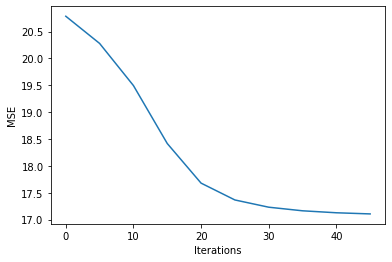

In [123]:
num_iter = 50
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 5), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [29]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[0.532, 0.556, 0.693, ..., 0.759, 0.082, 0.695],
       [1.11 , 0.955, 0.945, ..., 1.055, 0.209, 0.867],
       [1.142, 1.035, 1.099, ..., 1.22 , 0.205, 1.04 ],
       ...,
       [0.533, 0.535, 0.639, ..., 0.702, 0.086, 0.631],
       [1.214, 0.994, 0.91 , ..., 1.024, 0.238, 0.806],
       [1.068, 0.941, 0.961, ..., 1.07 , 0.197, 0.895]])

In [30]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [31]:
comparison_data
# For each data point, the number on the left is the original value from the dataset, the number on the right is the prediction

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 0.5320774068352142)","(8.79, 0.556415085146355)","(-9.66, 0.6931135663432558)","(-8.16, 0.8184907864706648)","(-7.52, 0.4213363643900693)","(-8.5, 0.7653532471478671)","(-9.85, 0.08016115439501907)","(4.17, 0.2531071679900332)","(-8.98, 0.5933236113930692)","(-4.76, 0.7372902107458718)","(-8.5, 0.6014504856058936)","(-6.75, 0.676085376110043)","(-7.18, 0.25020525789892123)","(8.45, 0.6553747568240698)","(-7.18, 0.3315788254149357)","(-7.52, 0.1447578254147977)","(-7.43, 0.6035365754733767)","(-9.81, 0.7574646667416658)","(-9.85, 0.22549799359661207)","(-9.85, 0.5985755187271491)","(-9.37, 0.5025147504780041)","(1.5, 0.4016815798161173)","(-4.37, 0.5564530098504482)","(-9.81, 0.5826693879913915)","(-8.5, 0.7221311374026282)","(1.12, 0.053289948118386464)","(7.82, 0.08531293276496295)","(2.86, 0.184771655757203)","(9.13, 0.2491219372767324)","(-7.43, 0.5962786866834822)","(2.14, 0.13355749262602729)","(-4.08, 0.3294023360700222)","(-9.08, 0.17732218835538105)","(99.0, 0.1860780844079924)","(5.05, 0.09153134455823801)","(4.95, 0.713839359396073)","(-9.17, 0.12296776584112905)","(-8.4, 0.6841604489362823)","(-8.4, 0.5008699805072966)","(-8.4, 0.45663738044397556)",...,"(99.0, 0.7928576682553997)","(3.59, 0.5266093791910904)","(99.0, 0.8057316204404569)","(-9.03, 0.3153165629511112)","(2.82, 0.1778985854312315)","(-1.36, 0.13921407288076745)","(99.0, 0.25119886480533915)","(8.3, 0.20122492478879012)","(99.0, 0.7266100202111184)","(-4.81, 0.21600189978761225)","(nan, 0.7971589773782896)","(nan, 0.7911580441354876)","(nan, 0.14220738834718394)","(nan, 0.14047041374068725)","(nan, 0.762462178585359)","(nan, 0.6547825240824836)","(nan, 0.7930516047839898)","(-9.42, 0.7384875781068311)","(nan, 0.17843879457709144)","(nan, 0.771034044794464)","(nan, 0.1912732872725333)","(-7.72, 0.16753845790920194)","(nan, 0.6272941045505888)","(nan, 0.4553346703003609)","(nan, 0.13996950851408443)","(nan, 0.8198864112606882)","(nan, 0.5945248242918582)","(nan, 0.2725290057510999)","(nan, 0.5869126504792719)","(nan, 0.07533817674412055)","(2.82, 0.6741358635617283)","(nan, 0.5968622138320574)","(nan, 0.41785150783629)","(nan, 0.1560209527988419)","(nan, 0.7194562190394336)","(nan, 0.27429943757499486)","(-5.63, 0.32526619128928647)","(nan, 0.7594283598186652)","(nan, 0.08194804419644203)","(nan, 0.6947267976862534)"
1,"(4.08, 1.110074292831487)","(-0.29, 0.9553079597828666)","(6.36, 0.9447213784499751)","(4.37, 1.0530082480085816)","(-2.38, 0.9975364363729919)","(-9.66, 1.1846033070558695)","(-0.73, 0.4654771720706131)","(-5.34, 0.6920371282638191)","(8.88, 1.12495370782746)","(9.22, 1.1828907583971193)","(6.75, 1.0225165988852534)","(8.64, 1.2973053994846608)","(4.42, 0.5678892874447903)","(7.43, 0.8711635613103558)","(4.56, 0.6516665225383927)","(99.0, 0.19262073080667594)","(4.66, 1.1273686276235275)","(-0.68, 0.7597777092090527)","(3.3, 0.6923336868050756)","(-1.21, 1.1030509057974929)","(0.87, 0.9803241449772452)","(8.64, 0.9339350557210987)","(99.0, 0.8182846511192755)","(9.17, 1.0412507359844863)","(0.05, 0.9513531879055747)","(7.57, 0.08920001945009838)","(4.71, 0.37076995664127815)","(0.87, 0.5631416649680423)","(-0.39, 0.74954352496483)","(6.99, 0.9884094088560352)","(6.5, 0.4520340725737884)","(-0.92, 0.7552987056756959)","(7.14, 0.3227833163962007)","(9.03, 0.5894772706566338)","(-1.8, 0.24335123616161633)","(0.73, 0.8703885712649752)","(7.09, 0.7650278624417215)","(3.4, 0.7722902465869464)","(-0.87, 0.7794058703903992)","(7.91, 0.7880418041638875)",...,"(-6.7, 1.268109016472036)","(-3.35, 0.8314736312813699)","(-9.03, 1.0744385905107217)","(4.47, 0.5196268339772998)","(4.08, 0.3393591373811636)","(-3.83, 0.5051819655991057)","(8.74, 0.876128112790379)","(99.0, 0.5787144712202265)","(0.78, 0.827277

In [64]:
data.iloc[20073,31]

-6.99

In [36]:
from google.colab import files
uploaded= files.upload()

Saving movies_latent_factors.xlsx to movies_latent_factors.xlsx


In [183]:
import io
users_pref_latentfactors=pd.read_excel(io.BytesIO(uploaded['movies_latent_factors.xlsx']), sheet_name= 'Users' )
items_latentfactor=pd.read_excel(io.BytesIO(uploaded['movies_latent_factors.xlsx']), sheet_name= 'Items' )

In [184]:
users_pref_latentfactors.head(3)

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
1,156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
2,5323,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552


In [185]:
items_latentfactor.head(3)

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092


In [186]:
Mov_idindex= items_latentfactor['Movie ID'].values
User_idindex= users_pref_latentfactors['User'].values
x= np.where(Mov_idindex == 1572)
items_latentfactor.iloc[x[0],7]

74    0.315561
Name: Factor6, dtype: float64

In [187]:
F13_index= items_latentfactor['Factor13'].values
y= np.where(F13_index == np.min(F13_index))
print(y)

(array([51]),)


In [188]:
users_pref_latentfactors= users_pref_latentfactors.drop(['User'], axis=1)
users_pref_latentfactors.head()

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
1,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
2,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
3,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669


In [189]:
items_latentfactor= items_latentfactor.drop(['Movie ID','Title'], axis=1)
items_latentfactor.head()

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566


In [190]:
npusers_pref= users_pref_latentfactors.values
nmitems_lf= items_latentfactor.values

ratings_movie= npusers_pref.dot(nmitems_lf.T)
ratings_df= pd.DataFrame(ratings_movie)
ratings_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.389174,0.191449,0.766364,-0.190918,-0.610322,-0.388917,-0.004002,0.190730,0.268826,1.188110,0.195472,1.075866,0.490713,-0.514578,-0.370327,-0.506850,-0.416795,0.263785,0.069576,-0.461273,-0.168938,0.248981,-0.088369,-0.320207,-0.171628,0.058226,0.287472,0.634223,0.216470,-0.269254,-0.023449,0.532674,0.471114,0.937787,0.414122,0.243899,-0.465304,-1.140411,0.593612,0.080442,...,0.366176,-0.402584,0.050475,0.149423,0.541162,0.661988,0.055876,-0.112212,-0.039461,0.450075,0.525795,-0.361932,-1.052730,0.378917,0.237825,0.309767,-0.154147,0.416629,0.304657,-1.417385,0.061697,-0.266492,-0.079663,0.543639,0.341835,0.129791,-1.246529,0.567501,-0.031013,0.077461,0.526472,-0.053100,0.116875,-0.167823,0.207883,0.248880,-0.264199,-0.395129,-0.522412,0.097010
1,0.883069,0.319496,0.396485,-0.380979,-0.187145,-0.862520,-0.119464,-0.044719,0.082417,0.345774,0.658106,0.510767,-0.125068,-0.151969,0.517930,0.472757,0.561092,-0.221019,-0.129598,-0.208213,-0.225939,0.702483,0.189687,0.337877,-0.260572,-0.292796,0.404124,-0.049005,-0.129483,-0.550813,0.336472,-0.119816,-0.242805,0.293419,0.268176,0.577851,-0.884860,-1.023764,0.199863,0.514953,...,0.304296,0.409391,-0.229632,-0.136578,-0.101327,-0.106959,-0.488648,-0.003041,-0.561891,0.251416,0.269787,0.052700,-0.328004,0.046813,0.016504,-0.218339,-0.111493,0.910234,0.885208,0.409308,-0.218698,0.033565,0.277388,0.277319,0.220398,-0.637950,-1.423655,0.097996,-0.354999,0.122281,-0.500473,0.357837,-0.041433,-0.072079,0.048516,0.062227,-0.179019,-0.259385,-0.455462,-0.113381
2,0.214068,0.154537,0.261073,-0.187174,0.502264,0.447514,-0.258614,-0.293113,-0.104059,0.073767,0.543291,0.045008,-0.059968,-0.036395,0.247560,0.237873,0.285821,-0.316820,-0.344919,-0.128238,-0.466908,0.759871,0.265635,-0.257978,-0.153931,-0.233692,0.360666,0.694714,-0.386115,0.027994,0.428741,0.192190,-0.259231,0.478752,0.327803,0.136766,0.372406,-0.399539,0.271648,0.181640,...,-0.086112,-0.018083,-0.393651,-0.302412,-0.066160,0.209991,0.010296,0.322565,-0.111107,0.228516,0.266962,0.169295,-0.032999,0.283415,0.106452,-0.271994,-0.156425,0.186516,0.101966,-0.421808,-0.256815,-0.018047,-0.302059,0.132926,0.080893,-0.199164,-0.413831,-0.097153,-0.334807,-0.106210,-0.517215,0.667856,-0.217218,-0.390654,-0.111029,0.046301,0.242631,-0.083633,-0.163929,-0.199840
3,-0.139366,0.129855,1.212876,-0.411287,0.484533,-0.865355,-0.162480,-0.028759,-0.096787,-0.187731,0.770433,-0.075722,-0.052166,-0.353584,1.858963,1.892477,1.891704,-0.352995,-0.238122,-0.155691,-0.465392,0.315802,-0.063346,0.164196,0.000219,-0.147500,0.776647,0.060033,-0.237285,-0.605052,-0.105234,0.085034,-0.552006,0.668020,-0.359605,-0.101019,-0.760042,-0.412730,0.558233,0.995228,...,0.468163,0.700335,-0.304751,-0.097778,0.158311,0.559324,0.103477,-0.223986,-0.366725,0.303603,-0.074221,-0.587257,-0.648043,-0.069623,-0.264658,-0.382602,-0.414798,-0.091951,-0.054668,0.499982,-0.226226,0.233677,0.175190,-0.197097,-0.192601,-1.233248,-1.337438,-0.163425,-0.334595,0.352293,-1.370533,0.271769,-0.125226,0.050462,0.132708,-0.197997,-0.307370,0.138995,0.003095,-0.524709
4,-0.038172,0.866052,-0.285316,0.016812,-0.249510,-0.702938,0.144358,-0.233250,0.253279,-0.146575,0.146374,-0.211549,-0.511296,0.149259,-0.215623,-0.246139,-0.158675,-0.085058,-0.153884,0.230182,0.171180,0.817499,0.003485,-0.007810,-0.564633,0.095389,-0.266832,0.163397,-0.165875,-0.066653,0.722882,-0.110033,0.047110,0.069928,-0.051499,0.511015,-0.674589,-0.460420,-0.017807,0.089402,...,0.039535,-0.003985,-0.054086,-0.236235,-0.297127,-0.120728,-0.136538,0.495312,-0.586712,0.165301,0.768090,0.179368,0.173325,0.011385,-0.365406,-0.311510,-0.133716,0.060928,-0.106457,-0.492626,-0.105881,-0.162837,-0.351193,0.174816,0.167268,-0.399136,-0.295934,-0.134954,0.082399,-0.098494,-0.282529,0.750208,

In [191]:
wa=np.where(User_idindex == 3947)
wb=np.where(Mov_idindex == 641)
print(wa, wb)

(array([17]),) (array([55]),)


In [192]:
ratings_df.iloc[wa[0],wb[0]]

,55
17,0.133656


In [193]:
ws=np.where(User_idindex == 4373)
print(ws)

(array([18]),)


In [ ]:
m_id= pd.DataFrame(Mov_idindex)
new_ratingsdf= pd.concat([ratings_df, m_id.T])
new_ratingsdf.head(26)

In [ ]:
for_sort= new_ratingsdf
for_sort= for_sort.sort_values(by= 18, axis=1)
for_sort.head(26)